<a href="https://colab.research.google.com/github/alda1896/clase2/blob/master/9_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from numpy import zeros, copy, linspace
from pylab import plot, show, xlabel, ylabel , title , legend

Un balon  de masa m = 1 kg es lanzado desde  el suelo a una altura x = 0 al aire y aterriza en x = 0 despues de 10 segundos. Es decir tenemos condiciones de contorno, no condiciones iniciales. 

si despreciamos los efectos de la fricción, la ecuacion diferencial que describe su movimiento es:


\begin{equation}
\frac{dx^2}{dt^2}=-g
\end{equation}

Resolvemos usando diferencias finitas

\begin{equation}
-g = \frac{x(t+h)+x(t-h)-2x(t)}{h^2}
\end{equation}

Despejamos para $x(t)$

\begin{equation}
 x(t) = \frac{gh^2+x(t+h)+(t-h)}{2}
\end{equation}


In [2]:
# Constantes
g = 9.81  # m/s^2
t_0 = 0
t_f = 10 # segundos
N = 100  # numero de pasos
h = t_f / N # tamaño del paso
c = g*h*h
epsilon = 1e-6 # objetivo de presición


721


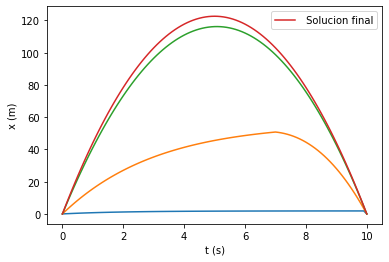

In [6]:
t_points= linspace(t_0,t_f,N+1)  # arreglo los valores de tiempo en segundos
x = zeros(N + 1, float)   # valores iniciales de x

w=0.9
error = 2 * epsilon
pasos = 0

while error > epsilon:
  pasos=pasos+1
  old_x=copy(x)
  for t in range (1,N):
    x[t] =((w+1)/ 2)*(c + x[t - 1] + x[t + 1])- w*x[t]  # Solucionamos usando Gauss-Seidel
  error = max(abs(old_x-x))

 # graficamos la soluciones
  if pasos == 1:
    plot(t_points, x)
  if pasos == 30:
     plot(t_points, x)  
  if pasos == 150:
     plot(t_points,x)    
  if pasos == 721:
     plot(t_points,x, label=" Solucion final")
     xlabel("t (s)")
     ylabel("x (m)")
     legend()

print(pasos)

Como podemos ver el metodo de relajación tambien permite encontrar la solucion a ecuacioens diferenciales ordinarias, sin embargo a  diferencia del método de shooting no nos da el valor inicial de la velocidad necesaria para lograr la solución requerida solo da solo la solución en sí. Podemos calcular la velocidad realizando la derivada numerica de las posiciones encontradas:


In [4]:
# velocidad inicial usando diferencias centrales
v_x=zeros([N+1],float)
v_x[1:N]=(x[2:N+1]+x[0:N-1])/(2*h)
print( "velocidad inicial = ", v_x[1])

velocidad inicial =  48.06897696474168


Podemos concluir que el método de relajación para ecuaciones diferenciales ordinarias es más útil cuando se desea conocer los detalles de la solución, pero no las condiciones iniciales.